<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/3.1-Use_Available_Simulators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install qiskit-experiments
!pip install imgaug==0.2.5
!pip install pylatexenc

References:
* https://qiskit.org/documentation/apidoc/providers_basicaer.html
* https://youtu.be/V4CwN4rEtVQ (qasm_simulator)
* https://youtu.be/GuppGy50dQ4 (statevector_simulator)
* https://youtu.be/5uT5fUq2HVM (unitary_simulator)



In [2]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

[default]
circuit_drawer = mpl
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/QC


## Use Available Python-based simulators
- qasm_simulator
- statevector_simulator
- unitary_simulator



In [5]:
from qiskit import BasicAer

backends = BasicAer.backends()
for b in backends:
  print(b)

qasm_simulator
statevector_simulator
unitary_simulator


### unitary_simulator
Returns the unitary operator for the circuit

In [17]:
#Returs the Unitary operation for the circuit
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import array_to_latex

qc = QuantumCircuit(1)
qc.h(0)


be = BasicAer.get_backend("unitary_simulator")
job = execute(qc, be)
result = job.result()

array_to_latex(result.data()['unitary'])

<IPython.core.display.Latex object>

### statevector_simulator
Returns the statevector corresponded to the output of the circuit

In [19]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import array_to_latex
qc = QuantumCircuit(1)
qc.h(0)

be = BasicAer.get_backend("statevector_simulator")

job = execute(qc, be)
result = job.result()

array_to_latex(result.data()['statevector'])

<IPython.core.display.Latex object>

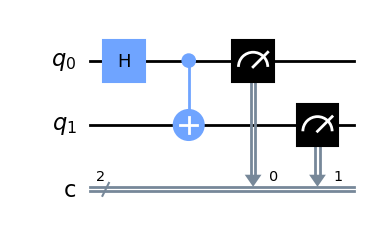

{'11': 4901, '00': 5099}


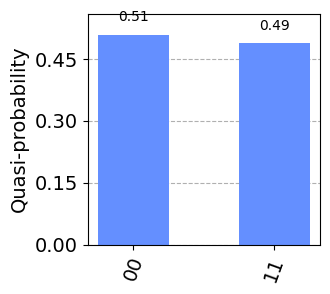

In [ ]:
#Using BasicAer to get a provider and execute the circuit
from qiskit import QuantumCircuit, execute, BasicAer
from qiskit.visualization import plot_distribution
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
display(qc.draw())

backend = BasicAer.get_backend("qasm_simulator")

job = execute(qc, backend, shots=10000)
result = job.result()
c = result.get_counts()
print(c)
plot_distribution(c, figsize=(3,3))

In [ ]:
#This code comes from the api documentation: https://qiskit.org/documentation/apidoc/execute.html
#The example uses WRONGLY the measure_all() - see the get_counts() result below
#The CLassical Register is duplicated. Solution: either qc must NOT define classical register
#or qc.measure(range(0,5),range(0,5)) must be used instead
from qiskit import QuantumCircuit, execute, BasicAer

backend = BasicAer.get_backend('qasm_simulator')

qc = QuantumCircuit(5, 5)
qc.h(0)
qc.cx(0, range(1, 5))
qc.measure_all()

job = execute(qc, backend, shots=4321)
job.result().get_counts()

{'00000': 2157, '11111': 2164}